## Results of Host Prediction
### Dataset: EMBL mapping, Vertebrates, Non-IDV

**Models**: FNN, CNN, RNN, LSTM, TF

**Positional Embedding**: Sin-Cos

**Maximum Sequence Length**: 1036

**Classification**: Multi-class

**\# classes**: 5

**\# train samples** = 

**\# validation samples** = 

**\# test samples** = 

In [1]:
import seaborn

In [61]:
! pip install statannotations
! pip install statsmodels
! pip install seaborn==0.11.0


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [55]:
import sys
import os
from scipy.stats import mannwhitneyu, wilcoxon, ranksums
from statannotations.Annotator import Annotator
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90',
 '/opt/conda/lib/python38.zip',
 '/opt/conda/lib/python3.8',
 '/opt/conda/lib/python3.8/lib-dynload',
 '',
 '/home/blessyantony/.local/lib/python3.8/site-packages',
 '/opt/conda/lib/python3.8/site-packages',
 '/opt/conda/lib/python3.8/site-packages/IPython/extensions',
 '/home/blessyantony/.ipython',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../../../..',
 '/home/bless

In [4]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import mannwhitneyu
from src.utils import visualization_utils
from statannotations.Annotator import Annotator

In [5]:
sns.__version__

'0.11.0'

In [6]:
itr_col = "itr"
experiment_col = "experiment"
y_true_col = "y_true"
human_col = "Human"
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['figure.autolayout'] = True

DEFAULT_FIGURE_CONFIG = {
    "figsize": (10, 10),
    "xtick.labelsize": 18,
    "ytick.labelsize": 18    
}




In [18]:
# df = pd.read_csv(os.path.join(os.getcwd(), "..", "..", "..", "..", "..", "output/evaluation/uniref90/20240517/host_multi_all_models/host_multi_all_models_evaluation_metrics.csv"))
# df = pd.read_csv(os.path.join(os.getcwd(), "..", "..", "..", "..", "..", "output/evaluation/uniref90/20240611/host_multi_all_models/host_multi_all_models-msl2048_evaluation_metrics.csv"))
df = pd.read_csv(os.path.join(os.getcwd(), "..",  "..", "..", "..", "output/evaluation/temp_new/host_multi_all_models_evaluation_metrics.csv"))
df.drop(columns="Unnamed: 0", inplace=True)
df

,itr,experiment,auroc,auprc
0,0,LR,0.893349,0.433765
1,1,LR,0.891542,0.428972
2,2,LR,0.897817,0.440230
3,3,LR,0.899019,0.464170
4,4,LR,0.894434,0.437962
5,0,RF,0.862589,0.389473
6,1,RF,0.854427,0.372238
7,2,RF,0.867218,0.395788
8,3,RF,0.861816,0.409787
9,4,RF,0.868538,0.373140


In [19]:
df = df.replace({"experiment": {"LR-maxitr5000": "LR", "Protein-BERT": "ProteinBERT", "VirPro-BERT": "VirProBERT", "Protein-BERT_new_ds": "ProteinBERT"}})

In [20]:
df["experiment"].unique()

array(['LR', 'RF', 'SVM', 'FNN', 'CNN', 'RNN', 'LSTM',
       'Transformer-Encoder', 'ProteinBERT', 'VirProBERT'], dtype=object)

In [65]:
sub_df = df[df["experiment"].isin(["LR", "RF", "SVM", "FNN", "CNN", "RNN", "LSTM", "Transformer-Encoder", "VirProBERT"])]
sub_df = sub_df.replace({"experiment": {"Hybd-sl256st64-CLS-vs30-AE-BN": "VirProBERT"}})

In [66]:
sub_df["experiment"].unique()

array(['LR', 'RF', 'SVM', 'FNN', 'CNN', 'RNN', 'LSTM',
       'Transformer-Encoder', 'VirProBERT'], dtype=object)

In [81]:
pairs = [#("ProteinBERT", "VirProBERT"),
         ("VirProBERT", "Transformer-Encoder"),
         ("VirProBERT", "LSTM"),
         ("VirProBERT", "RNN"),
         ("VirProBERT", "CNN"),
         ("VirProBERT", "FNN")]

def plot_boxplot_w_stat_tests(df, metric, pairs, location, ylim):
    
    p_values = []
    for pair in pairs:
        model_1_values = df[df["experiment"] == pair[0]][metric].values
        model_2_values = df[df["experiment"] == pair[1]][metric].values
        p_value = mannwhitneyu(model_1_values, model_2_values, alternative="greater").pvalue
        formatted_pvalue = f"p={p_value:.2e}"
        print(f"{pair}: p-value={formatted_pvalue}")
        p_values.append(p_value)
        
    
    DEFAULT_FIGURE_CONFIG = {
        "figsize": (16, 10),
        "xtick.labelsize": 20,
        "ytick.labelsize": 20
    }

    plotting_parameters = {
        'data':    df,
        'x':       'experiment',
        'y':       metric,
        "linewidth": 2.5,
        #"edgecolor": "black",
        #"linecolor": "black",
#         "boxprops": {"edgecolor": "black"},
#         "whiskerprops": {"color": "black"},
#         "flierprops": {"color": "black"},
#         "fliersize": 7.0,
#         "medianprops": {"linewidth": 2.5},
        'palette': "colorblind",
        #"notch": True,
        #"fill": True
    }

    visualization_utils.pre_plot_config(DEFAULT_FIGURE_CONFIG)
    ax = sns.boxplot(**plotting_parameters)
    sns.stripplot(data=df, x="experiment", y=metric, ax=ax, color="black", size=8)
    #sns.swarmplot(data=df, x="experiment", y=metric, ax=ax, color="black")
    
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_custom_annotations(p_values)
    annotator.configure(loc=location)
    annotator.set_pvalues(p_values)
    #annotator.configure(test="Mann-Whitney", loc=location)
    ax.set_xlabel("", size=20, labelpad=5)
    ax.set_ylabel(metric.upper(), size=22)
    #plt.xticks(rotation=90)
    visualization_utils.wrap_ticklabels(ax, axis="x", label_width=11, break_long_words=True)
    #annotator.apply_and_annotate()
    annotator.annotate()
    ax.set_ylim(*ylim)
    
    plt.tight_layout()
    # plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", "..", f"output/visualization/temp/host_multi_all_models_{metric}_boxplot_stat.pdf"), bbox_inches="tight")
    plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", f"output/visualization/temp_new/host_multi_all_models_{metric}_boxplot_stat.pdf"), bbox_inches="tight")
    plt.show()

('VirProBERT', 'Transformer-Encoder'): p-value=p=6.09e-03
('VirProBERT', 'LSTM'): p-value=p=6.09e-03
('VirProBERT', 'RNN'): p-value=p=6.09e-03
('VirProBERT', 'CNN'): p-value=p=6.09e-03
('VirProBERT', 'FNN'): p-value=p=5.58e-03
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Transformer-Encoder vs. VirProBERT: Custom statistical test, P_val:6.093e-03
LSTM vs. VirProBERT: Custom statistical test, P_val:6.093e-03
RNN vs. VirProBERT: Custom statistical test, P_val:6.093e-03
CNN vs. VirProBERT: Custom statistical test, P_val:6.093e-03
FNN vs. VirProBERT: Custom statistical test, P_val:5.580e-03


/home/blessyantony/.local/lib/python3.8/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


<Figure size 432x288 with 0 Axes>

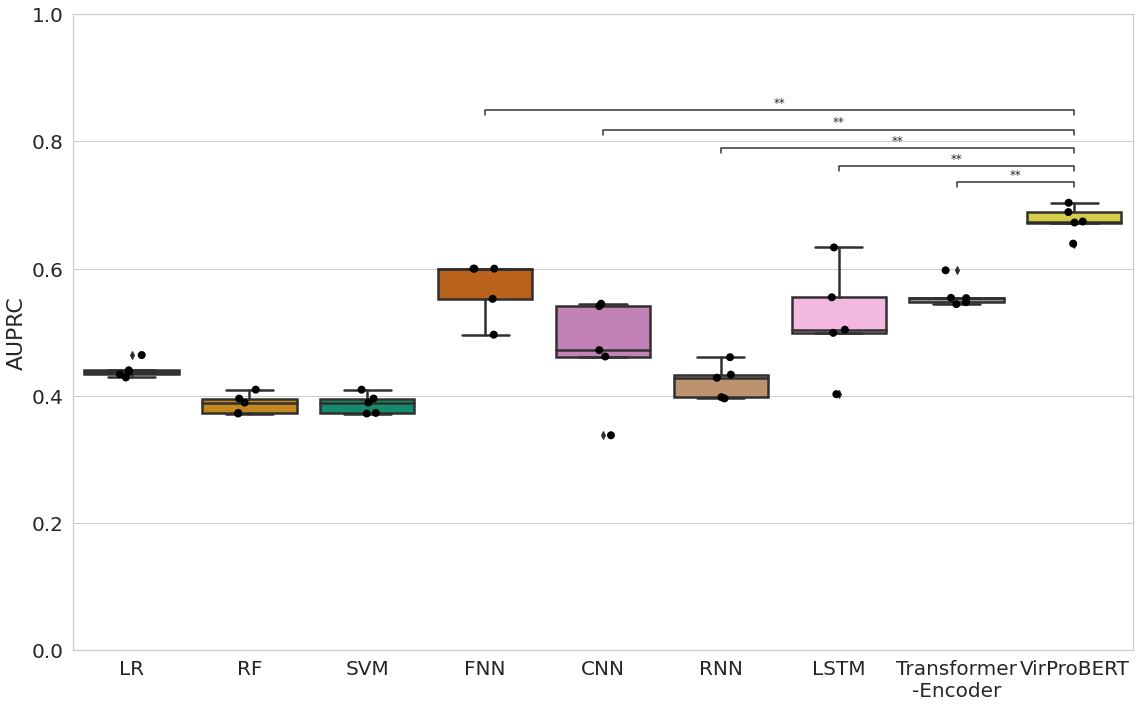

In [82]:
plot_boxplot_w_stat_tests(sub_df, "auprc", pairs, location="inside", ylim=(0, 1))

<Figure size 432x288 with 0 Axes>

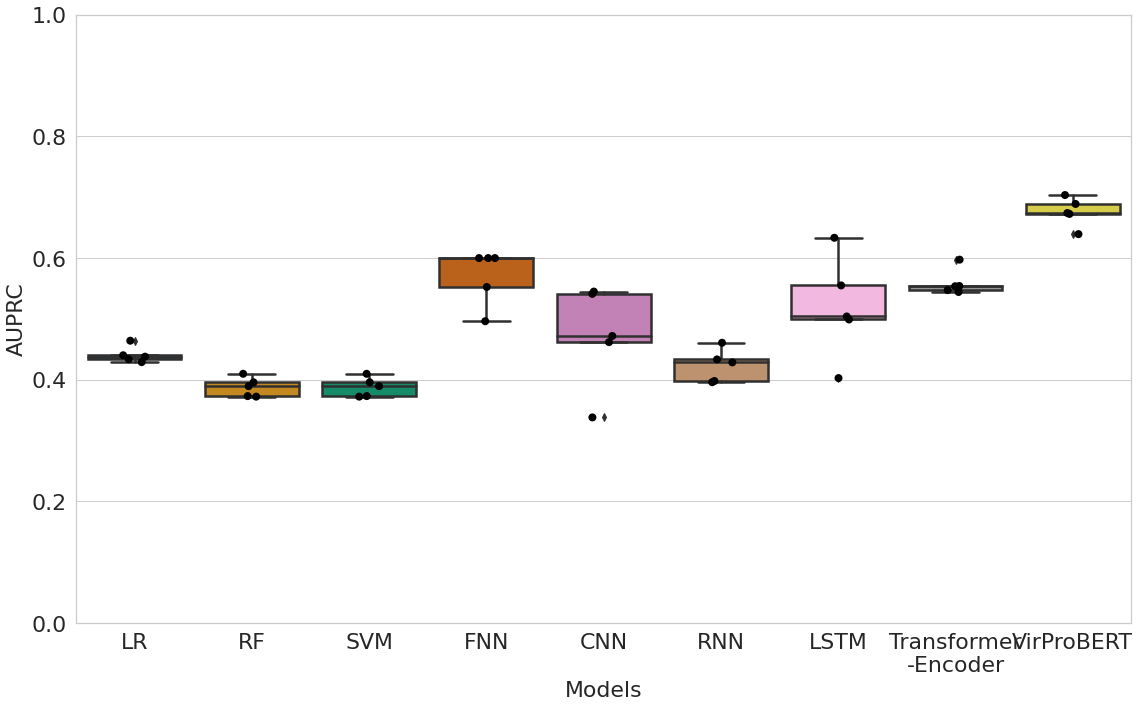

In [39]:
metric="auprc"
DEFAULT_FIGURE_CONFIG = {
        "figsize": (20, 10),
        "xtick.labelsize": 22,
        "ytick.labelsize": 22
    }

plotting_parameters = {
    'data':    sub_df,
    'x':       'experiment',
    'y':       metric,
    "linewidth": 2.5,
    #"edgecolor": "black",
    #"linecolor": "black",
#         "boxprops": {"edgecolor": "black"},
#         "whiskerprops": {"color": "black"},
#         "flierprops": {"color": "black"},
#         "fliersize": 7.0,
#         "medianprops": {"linewidth": 2.5},
    'palette': "colorblind",
    #"notch": True,
    #"fill": True
}

visualization_utils.pre_plot_config(DEFAULT_FIGURE_CONFIG)
ax = sns.boxplot(**plotting_parameters)
sns.stripplot(data=sub_df, x="experiment", y=metric, ax=ax, color="black", size=8)

ax.set_xlabel("Models", size=22, labelpad=5)
ax.set_ylabel(metric.upper(), size=22)
visualization_utils.wrap_ticklabels(ax, axis="x", label_width=11, break_long_words=True)
ax.set_ylim(0., 1)

plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", f"output/visualization/temp_new/host_multi_all_models_{metric}_boxplot.pdf"), bbox_inches="tight")
#plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", "..", f"output/visualization/uniref90/20240517/host_multi_all_models/host_multi_all_models_{metric}_boxplot_stat.pdf"), bbox_inches="tight")
plt.show()